In [1]:
import csv
import pandas as pd

In [2]:
def fix():
    with open('scandi.csv', 'r') as infile, open('scandi_fixed.csv', 'w', newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        for row in reader:
            if len(row) >= 16 and row[15] != '':
                row[14] = row[14] + ' ' + row[15]
                row.pop(15)
            writer.writerow(row)

fix()

In [13]:
# 1 = Bloomberg Code/Stock identifier
# 3 = Bid Price
# 4 = Ask Price
# 5 = Trade Price
# 6 = Bid Volume
# 7 = Ask Volume
# 8 = Trade Volume
# 9 = Update type => 1=Trade; 2= Change to Bid (Px or Vol); 3=Change to Ask (Px or Vol)
# 11 = Date
# 12 = Time in seconds past midnight
# 15 = Condition codes

data = pd.read_csv('scandi_fixed.csv', header=None, usecols=[0,2,3,4,5,6,7,8,10,11,14],
                   names=['stock', 'bid price', 'ask price', 'trade price',
                          'bid vol', 'ask vol', 'trade vol', 'update type', 'date', 'time', 'cond'])

data.sort_values(by=['date', 'time'])     # Just ensure

,stock,bid price,ask price,trade price,bid vol,ask vol,trade vol,update type,date,time,cond
0,BBHBEAT Index,121.40,125.40,123.40,1234,1234,1234,2,20150420,28264.0,@1
1,BBHBEAT Index,121.40,125.40,123.40,1234,1234,1234,2,20150420,28265.0,@1
2,BBHBEAT Index,121.40,125.40,123.40,1234,1234,1234,2,20150420,28266.0,@1
3,BBHBEAT Index,121.40,125.40,123.40,1234,1234,1234,2,20150420,28267.0,@1
4,BBHBEAT Index,121.40,125.40,123.40,1234,1234,1234,2,20150420,28268.0,@1
...,...,...,...,...,...,...,...,...,...,...,...
13260272,LUPE SS Equity,137.80,138.80,138.60,10157,4677,298449,2,20150423,59700.0,@1
13260273,WRT1V FH Equity,42.40,43.10,42.95,150,100,141176,2,20150423,59700.0,@1
13260274,KRA1V FH Equity,10.91,10.97,10.93,1740,1569,53741,3,20150423,59700.0,@1
13260275,BBHBEAT Index,121.40,125.40,123.40,1234,1234,1234,2,20150423,59700.0,@1


In [14]:
# Mean time between trades
# Median time between trades
# Longest time between trades
#data[(data['update type'] == 1) & (data['date'].diff() == 0)].groupby('date')['time'].diff().describe()
trade_data = data[data['update type'] == 1][['trade price', 'trade vol', 'date', 'time']]
trade_intervals = trade_data[trade_data['date'].diff() == 0].groupby('date')['time'].diff().dropna()
trade_intervals.describe()

count    1.530047e+06
mean     7.999493e-02
std      5.266928e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.710000e+02
Name: time, dtype: float64

In [22]:
# Mean time between tick changes
# Median time between tick changes
# Longest time between tick changes
#data[(data['update type'].isin([2,3])) & (data['date'].diff() == 0)].groupby('date')['time'].diff().describe()
tick_data = data[data['update type'].isin([2,3])][['date', 'time']]
tick_intervals = tick_data[tick_data['date'].diff() == 0].groupby('date')['time'].diff().dropna()
tick_intervals.describe()

count    1.167510e+07
mean     1.077035e-02
std      1.032324e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.000000e+00
Name: time, dtype: float64

In [23]:
# Mean bid ask spread
# Median bid ask spread
#data[(data['bid price'] != 0) & (data['ask price'] != 0)][['bid price', 'ask price']].diff(axis=1).abs().drop(columns='bid price').rename(columns={'ask price': 'spread'}).describe()
bid_ask_price = data[(data['bid price'] != 0) & (data['ask price'] != 0)][['bid price', 'ask price']]
bid_ask_spread = (bid_ask_price['bid price'] - bid_ask_price['ask price']).abs()
bid_ask_spread.describe()

count    1.321186e+07
mean     6.023452e-01
std      1.233398e+01
min      0.000000e+00
25%      5.000000e-02
50%      1.000000e-01
75%      2.000000e-01
max      1.640000e+03
dtype: float64

<Axes: >

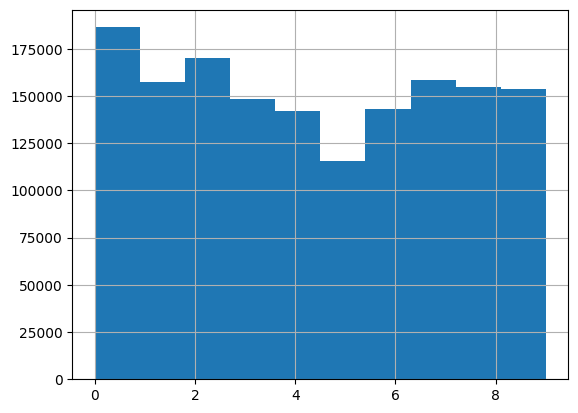

In [24]:
# Examples of the round number effect: trade price
trade_data['trade price'].round().mod(10).hist()

<Axes: >

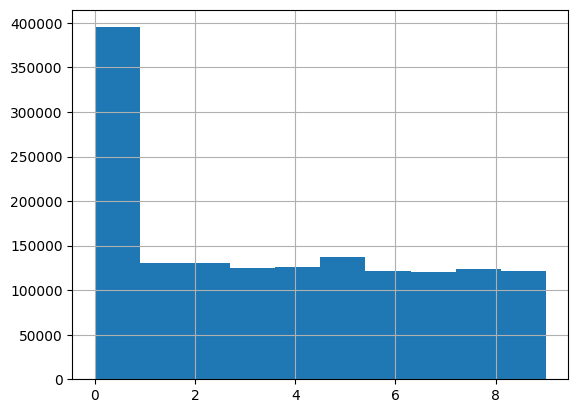

In [25]:
# Examples of the round number effect: trade volume
trade_data['trade vol'].round().mod(10).hist()